# CPS 396D
# Exam 2
## 100 Points Total

The exam is open book, open notes. It is 50 minutes in length, and consists of 3 open-ended questions you must answer either programmmatically or via a combination of programs and visualization.

Comments required to get partial credit. 

Submission must be via BlackBoard as a Jupyter notebook.

Assume you have the following velocity function, representing the velocity done during a road trip. You must determine the distance traveled and the maximum acceleration. HINT: numpy and sympy both have trig functions.

$v(t) = 2 * (cos(\frac{\pi}{4} * t - \pi) + 1)$

### 1. What is the distance traveled from time t = 0 to time t = 31.5? Assume units of minutes for t and miles for d. (40 Points)

The vehicle traveled 63.97 miles


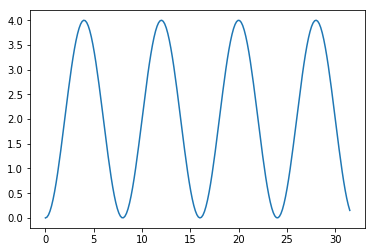

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

def integrateByTrapezoids(f, x1, x2, w):
    result = 0.0
    
    i = x1 # Initial starting point
    while i <= x2: # Loop until reaching the end
        # Calculate f(i)
        f_i = f(i)
        # Calculate f(i + w)
        f_iw = f(i + w)
        # Calculate the area under the trapezoid
        result += (w * f_i) + (0.5  * w * (f_iw - f_i))
        
        i += w
    return result

def velocity(t): #Velocity as a function of time
    result = 2 * (np.cos(np.pi / 4 * t - np.pi) + 1)
    return result

distance = integrateByTrapezoids(velocity, 0, 31.5, 1e-3)
print('The vehicle traveled {:.2f} miles'.format(distance))

times = np.linspace(0, 31.5, 200)
vels = velocity(times)

figs, ax = plt.subplots()

ax.plot(times, vels)

## 2. What was the maximum acceleration during this 31.5 minute period? (40 Points)

In [2]:
# Method to numerically approximate the derivative at a point
def derivativeAtAPoint2(f, x, h):
    result = (f(x + h) - f(x - h)) / (2 * h)
    return result

accelerations = derivativeAtAPoint2(velocity, times, 1e-4)

# print(accelerations)

# Calculate the maximum value in the collection
def calcMax(accelerations):
    result = -999.25 # Magic number represented exactly in floating point
                     # Used ofter to represent NULL or not calculated
    for i in range(accelerations.size):
        if accelerations[i] > result:
            result = accelerations[i]
        
    return result

# Method 1: Use the calcMax method above
maxAcceleration = calcMax(accelerations)
print('The max acceleration is {:.2f} miles/minute squared'.format(maxAcceleration))

# Method 2: Use the max() method in python
maxAcceleration2 = max(accelerations)
print('The max acceleration is {:.2f} miles/minute squared'.format(maxAcceleration2))

#Method 3: Use the max method in the np class (OOP method)
maxAcceleration = accelerations.max()
print('The max acceleration is {:.2f} miles/minute squared'.format(maxAcceleration))

The max acceleration is 1.57 miles/minute squared
The max acceleration is 1.57 miles/minute squared
The max acceleration is 1.57 miles/minute squared


## 3. What is the average velocity of the 31.5 minute trip in miles per minute? (20 Points)

In [3]:
ave = distance / 31.5
print('The average velocity is {:.2f} miles per minute, or {:.2f} mph.'.format(ave, ave * 60))

The average velocity is 2.03 miles per minute, or 121.86 mph.


## Alternate method of answering Question 1 above

In [4]:
import sympy

# Initialize the variables
t = sympy.Symbol('t')
expr = 2 * (sympy.cos(sympy.pi / 4 * t - (sympy.pi)) + 1)

# Definite integral
distance = sympy.integrate(expr, (t, 0, 31.5))
print('The vehicle traveled {:.2f} miles'.format(float(distance)))

The vehicle traveled 63.97 miles


## Alternate method of answering Question 2 above

In [5]:
# Symbolic differentiation 
diffExpr = sympy.diff(expr)

# Evaluate the derivatives at the time intervals
accelerations = [diffExpr.subs(t, tt).evalf(6) for tt in times]

# Get the maximum value
maxAcceleration = max(accelerations)
print('The max acceleration is {:.2f} miles/minute squared'.format(maxAcceleration))
# print(accelerations)

The max acceleration is 1.57 miles/minute squared


## Example of plotting the velocity, acceleration and distance

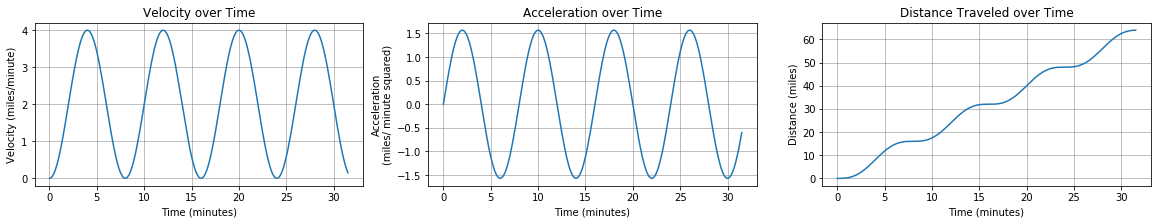

In [6]:
## Plots of the velocity, distance and acceleration over time

figs, ax = plt.subplots(1, 3, figsize=(20, 3))

def setLabels(plot, x, y, title):
    plot.set_xlabel(x)
    plot.set_ylabel(y)
    plot.set_title(title)
    plot.grid(color="grey", which="major", axis='x', linestyle='-', linewidth=0.5)
    plot.grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.5)

# Velocity plot
ax[0].plot(times, vels)
setLabels(ax[0], 'Time (minutes)', 'Velocity (miles/minute)', 'Velocity over Time')

ax[1].plot(times, accelerations)
setLabels(ax[1], 'Time (minutes)', 'Acceleration\n(miles/ minute squared)', 'Acceleration over Time')

distances = [sympy.integrate(expr, (t, 0, curT)) for curT in times]
setLabels(ax[2], 'Time (minutes)', 'Distance (miles)', 'Distance Traveled over Time')
ax[2].plot(times, distances)